In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/TwitterSentimentProject')

print("✅ Setup complete!")
print("Current directory:", os.getcwd())

Mounted at /content/drive
✅ Setup complete!
Current directory: /content/drive/MyDrive/TwitterSentimentProject


In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from scipy.sparse import load_npz

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Embedding, LSTM, Dropout,
                                     Conv1D, GlobalMaxPooling1D, Bidirectional)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

print("✅ Libraries imported!")
print(f"TensorFlow version: {tf.__version__}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

✅ Libraries imported!
TensorFlow version: 2.19.0


In [3]:
# Load TF-IDF data (for traditional ML models)
print("Loading TF-IDF data...")
X_train_tfidf = load_npz('data/processed/X_train_tfidf.npz')
X_val_tfidf = load_npz('data/processed/X_val_tfidf.npz')
X_test_tfidf = load_npz('data/processed/X_test_tfidf.npz')
print(f"✅ TF-IDF loaded: Train {X_train_tfidf.shape}, Val {X_val_tfidf.shape}, Test {X_test_tfidf.shape}")

# Load sequences (for deep learning models)
print("\nLoading sequences...")
X_train_seq = np.load('data/processed/X_train_seq.npy')
X_val_seq = np.load('data/processed/X_val_seq.npy')
X_test_seq = np.load('data/processed/X_test_seq.npy')
print(f"✅ Sequences loaded: Train {X_train_seq.shape}, Val {X_val_seq.shape}, Test {X_test_seq.shape}")

# Load labels
print("\nLoading labels...")
y_train = np.load('data/processed/y_train.npy')
y_val = np.load('data/processed/y_val.npy')
y_test = np.load('data/processed/y_test.npy')
print(f"✅ Labels loaded: Train {y_train.shape}, Val {y_val.shape}, Test {y_test.shape}")

# Load embedding matrix
print("\nLoading embedding matrix...")
embedding_matrix = np.load('models/embedding_matrix.npy')
print(f"✅ Embedding matrix loaded: {embedding_matrix.shape}")

# Load configuration
with open('data/processed/split_summary.json', 'r') as f:
    config = json.load(f)
print(f"\n✅ Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

Loading TF-IDF data...
✅ TF-IDF loaded: Train (69376, 5000), Val (14866, 5000), Test (14867, 5000)

Loading sequences...
✅ Sequences loaded: Train (69376, 50), Val (14866, 50), Test (14867, 50)

Loading labels...
✅ Labels loaded: Train (69376,), Val (14866,), Test (14867,)

Loading embedding matrix...
✅ Embedding matrix loaded: (10000, 100)

✅ Configuration loaded:
  train_size: 69376
  val_size: 14866
  test_size: 14867
  vocab_size: 46963
  max_words: 10000
  max_len: 50
  embedding_dim: 100
  embedding_coverage: 88.57000000000001


In [4]:
print("="*70)
print("TRAINING LOGISTIC REGRESSION")
print("="*70)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

print("\nTraining...")
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_tfidf)
y_val_pred_lr = lr_model.predict(X_val_tfidf)
y_test_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"\n✅ Logistic Regression trained!")
print(f"Train Accuracy: {train_acc_lr:.4f}")
print(f"Validation Accuracy: {val_acc_lr:.4f}")
print(f"Test Accuracy: {test_acc_lr:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr, target_names=['Negative', 'Positive']))

# Save model
with open('models/logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("✅ Model saved!")

TRAINING LOGISTIC REGRESSION

Training...

✅ Logistic Regression trained!
Train Accuracy: 0.7992
Validation Accuracy: 0.7734
Test Accuracy: 0.7731

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.78      0.75      0.77      7429
    Positive       0.76      0.79      0.78      7438

    accuracy                           0.77     14867
   macro avg       0.77      0.77      0.77     14867
weighted avg       0.77      0.77      0.77     14867

✅ Model saved!


In [5]:
print("="*70)
print("TRAINING NAIVE BAYES")
print("="*70)

# Train Naive Bayes
nb_model = MultinomialNB()

print("\nTraining...")
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred_nb = nb_model.predict(X_train_tfidf)
y_val_pred_nb = nb_model.predict(X_val_tfidf)
y_test_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
val_acc_nb = accuracy_score(y_val, y_val_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"\n✅ Naive Bayes trained!")
print(f"Train Accuracy: {train_acc_nb:.4f}")
print(f"Validation Accuracy: {val_acc_nb:.4f}")
print(f"Test Accuracy: {test_acc_nb:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_nb, target_names=['Negative', 'Positive']))

# Save model
with open('models/naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
print("✅ Model saved!")

TRAINING NAIVE BAYES

Training...

✅ Naive Bayes trained!
Train Accuracy: 0.7838
Validation Accuracy: 0.7609
Test Accuracy: 0.7596

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.76      0.76      0.76      7429
    Positive       0.76      0.76      0.76      7438

    accuracy                           0.76     14867
   macro avg       0.76      0.76      0.76     14867
weighted avg       0.76      0.76      0.76     14867

✅ Model saved!


In [6]:
print("="*70)
print("TRAINING RANDOM FOREST")
print("="*70)

# Train Random Forest
# Note: Random Forest is slow with high-dimensional data, so we use fewer trees
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20,
                                  random_state=42, n_jobs=-1, verbose=1)

print("\nTraining...")
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_tfidf)
y_val_pred_rf = rf_model.predict(X_val_tfidf)
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n✅ Random Forest trained!")
print(f"Train Accuracy: {train_acc_rf:.4f}")
print(f"Validation Accuracy: {val_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf, target_names=['Negative', 'Positive']))

# Save model
with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("✅ Model saved!")

TRAINING RANDOM FOREST

Training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished



✅ Random Forest trained!
Train Accuracy: 0.7494
Validation Accuracy: 0.7180
Test Accuracy: 0.7207

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.76      0.64      0.70      7429
    Positive       0.69      0.80      0.74      7438

    accuracy                           0.72     14867
   macro avg       0.73      0.72      0.72     14867
weighted avg       0.73      0.72      0.72     14867

✅ Model saved!


In [7]:
# Check GPU availability
print("Checking GPU...")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU available: {gpus}")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("⚠️ No GPU found. Using CPU (training will be slower)")
    print("To enable GPU: Runtime → Change runtime type → GPU")

Checking GPU...
✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
print("="*70)
print("BUILDING LSTM MODEL")
print("="*70)

# Model parameters
MAX_WORDS = config['max_words']
MAX_LEN = config['max_len']
EMBEDDING_DIM = config['embedding_dim']
vocab_size = min(MAX_WORDS, embedding_matrix.shape[0])

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=True,  # Freeze pre-trained embeddings
              name='embedding'),

    LSTM(128, return_sequences=False, name='lstm'),
    Dropout(0.5, name='dropout'),
    Dense(64, activation='relu', name='dense'),
    Dropout(0.3, name='dropout_2'),
    Dense(1, activation='sigmoid', name='output')
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(lstm_model.summary())

BUILDING LSTM MODEL


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
# Train LSTM
print("\nTraining LSTM...")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('models/lstm_model.h5', save_best_only=True, monitor='val_accuracy')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train
history_lstm = lstm_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

print("\n✅ LSTM training complete!")

# Evaluate
train_loss_lstm, train_acc_lstm = lstm_model.evaluate(X_train_seq, y_train, verbose=0)
val_loss_lstm, val_acc_lstm = lstm_model.evaluate(X_val_seq, y_val, verbose=0)
test_loss_lstm, test_acc_lstm = lstm_model.evaluate(X_test_seq, y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc_lstm:.4f}")
print(f"Validation Accuracy: {val_acc_lstm:.4f}")
print(f"Test Accuracy: {test_acc_lstm:.4f}")

# Predictions for detailed metrics
y_test_pred_lstm_prob = lstm_model.predict(X_test_seq, verbose=0)
y_test_pred_lstm = (y_test_pred_lstm_prob > 0.5).astype(int).flatten()

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lstm, target_names=['Negative', 'Positive']))


Training LSTM...
Epoch 1/20
1080/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6393 - loss: 0.6199

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6397 - loss: 0.6196 - val_accuracy: 0.7408 - val_loss: 0.5305 - learning_rate: 5.0000e-04
Epoch 2/20
1077/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7715 - loss: 0.4928

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7716 - loss: 0.4928 - val_accuracy: 0.7703 - val_loss: 0.4846 - learning_rate: 5.0000e-04
Epoch 3/20
1076/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - loss: 0.4590

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7912 - loss: 0.4590 - val_accuracy: 0.7710 - val_loss: 0.4782 - learning_rate: 5.0000e-04
Epoch 4/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8047 - loss: 0.4369 - val_accuracy: 0.7647 - val_loss: 0.4838 - learning_rate: 5.0000e-04
Epoch 5/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8160 - loss: 0.4154 - val_accuracy: 0.7679 - val_loss: 0.4973 - learning_rate: 5.0000e-04
Epoch 6/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8250 - loss: 0.3968 - val_accuracy: 0.7587 - val_loss: 0.5113 - learning_rate: 5.0000e-04
Epoch 7/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8349 - loss: 0.3789 - val_accuracy: 0.7650 - val_loss: 0.4996 - learning_rate: 5.0000e-04
Epoch 8/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8408 - loss: 0.3650 - val_accuracy: 0.7611 - val_loss: 0.5259 - learning_rate: 5.0000e-04

✅ LSTM training complete!

Train Accuracy: 0.8062
Validation A

In [ ]:
print("="*70)
print("RETRAINING BiLSTM WITH OPTIMIZED PARAMETERS")
print("="*70)

# Build improved BiLSTM
bilstm_improved = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=True,  # NOW TRAINABLE
              name='embedding'),

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2), name='bi_lstm_1'),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.2), name='bi_lstm_2'),
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.5, name='dropout_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dropout(0.3, name='dropout_2'),
    Dense(1, activation='sigmoid', name='output')
])

bilstm_improved.compile(
    optimizer=Adam(learning_rate=0.0005),  # Slightly lower LR
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(bilstm_improved.summary())

# Better callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('models/bilstm_improved.h5', save_best_only=True, monitor='val_accuracy', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Train longer
print("\nTraining for up to 20 epochs...")
history_bilstm_improved = bilstm_improved.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,  # More epochs
    batch_size=64,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

print("\n✅ Improved BiLSTM training complete!")

# Evaluate
test_loss, test_acc = bilstm_improved.evaluate(X_test_seq, y_test, verbose=0)
print(f"\n🎯 Improved BiLSTM Test Accuracy: {test_acc:.4f}")

# Compare with Logistic Regression
print(f"\n📊 Comparison:")
print(f"Logistic Regression: {test_acc_lr:.4f}")
print(f"Improved BiLSTM:     {test_acc:.4f}")
print(f"Improvement:         {(test_acc - test_acc_lr):.4f} ({(test_acc - test_acc_lr)/test_acc_lr*100:+.2f}%)")

# Detailed metrics
y_pred_improved_prob = bilstm_improved.predict(X_test_seq, verbose=0)
y_pred_improved = (y_pred_improved_prob > 0.5).astype(int).flatten()

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_improved, target_names=['Negative', 'Positive']))

RETRAINING BiLSTM WITH OPTIMIZED PARAMETERS


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_1 (Bidirectional)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_2 (Bidirectional)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

None

Training for up to 20 epochs...
Epoch 1/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6714 - loss: 0.6012
Epoch 1: val_accuracy improved from -inf to 0.76073, saving model to models/bilstm_improved.h5


1084/1084 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.6715 - loss: 0.6011 - val_accuracy: 0.7607 - val_loss: 0.4937 - learning_rate: 5.0000e-04
Epoch 2/20
1083/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7691 - loss: 0.4912
Epoch 2: val_accuracy improved from 0.76073 to 0.77539, saving model to models/bilstm_improved.h5


1084/1084 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7691 - loss: 0.4912 - val_accuracy: 0.7754 - val_loss: 0.4729 - learning_rate: 5.0000e-04
Epoch 3/20
1081/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7884 - loss: 0.4581
Epoch 3: val_accuracy improved from 0.77539 to 0.77930, saving model to models/bilstm_improved.h5


1084/1084 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7884 - loss: 0.4580 - val_accuracy: 0.7793 - val_loss: 0.4653 - learning_rate: 5.0000e-04
Epoch 4/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8020 - loss: 0.4373
Epoch 4: val_accuracy improved from 0.77930 to 0.78145, saving model to models/bilstm_improved.h5


1084/1084 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8020 - loss: 0.4373 - val_accuracy: 0.7814 - val_loss: 0.4634 - learning_rate: 5.0000e-04
Epoch 5/20
1081/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8127 - loss: 0.4198
Epoch 5: val_accuracy did not improve from 0.78145
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8127 - loss: 0.4198 - val_accuracy: 0.7809 - val_loss: 0.4662 - learning_rate: 5.0000e-04
Epoch 6/20
1083/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8189 - loss: 0.4047
Epoch 6: val_accuracy did not improve from 0.78145
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8189 - loss: 0.4047 - val_accuracy: 0.7798 - val_loss: 0.4710 - learning_rate: 5.0000e-04
Epoch 7/20
1083/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8282 - loss: 0.3869
Epoch 7: val_accuracy did not improve from 0.78145

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy:

In [11]:
print("="*70)
print("BUILDING CNN MODEL")
print("="*70)

# Build CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=True,
              name='embedding'),

    Conv1D(128, 5, activation='relu', name='conv1d_1'),
    GlobalMaxPooling1D(name='global_max_pool'),
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.5, name='dropout_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dropout(0.3, name='dropout_2'),
    Dense(1, activation='sigmoid', name='output')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(cnn_model.summary())

BUILDING CNN MODEL


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pool                 │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Train CNN
print("\nTraining CNN...")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('models/cnn_model.h5', save_best_only=True, monitor='val_accuracy')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train
history_cnn = cnn_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

print("\n✅ CNN training complete!")

# Evaluate
train_loss_cnn, train_acc_cnn = cnn_model.evaluate(X_train_seq, y_train, verbose=0)
val_loss_cnn, val_acc_cnn = cnn_model.evaluate(X_val_seq, y_val, verbose=0)
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test_seq, y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc_cnn:.4f}")
print(f"Validation Accuracy: {val_acc_cnn:.4f}")
print(f"Test Accuracy: {test_acc_cnn:.4f}")

# Predictions
y_test_pred_cnn_prob = cnn_model.predict(X_test_seq, verbose=0)
y_test_pred_cnn = (y_test_pred_cnn_prob > 0.5).astype(int).flatten()

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_cnn, target_names=['Negative', 'Positive']))


Training CNN...
Epoch 1/20
1073/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6491 - loss: 0.6178

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6498 - loss: 0.6172 - val_accuracy: 0.7597 - val_loss: 0.4985 - learning_rate: 5.0000e-04
Epoch 2/20
1074/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7758 - loss: 0.4794

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7758 - loss: 0.4793 - val_accuracy: 0.7734 - val_loss: 0.4786 - learning_rate: 5.0000e-04
Epoch 3/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8074 - loss: 0.4300 - val_accuracy: 0.7691 - val_loss: 0.4837 - learning_rate: 5.0000e-04
Epoch 4/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8325 - loss: 0.3825 - val_accuracy: 0.7644 - val_loss: 0.5154 - learning_rate: 5.0000e-04
Epoch 5/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8619 - loss: 0.3251 - val_accuracy: 0.7521 - val_loss: 0.5945 - learning_rate: 5.0000e-04
Epoch 6/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8890 - loss: 0.2665 - val_accuracy: 0.7543 - val_loss: 0.7206 - learning_rate: 5.0000e-04
Epoch 7/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9077 - loss: 0.2231 - val_accuracy: 0.7518 - val_loss: 0.7567 - learning_rate: 5.0000e-04

✅ CNN training complete!

Train Accuracy: 0.8185
Validation Ac

In [13]:
print("="*70)
print("BUILDING BIDIRECTIONAL LSTM MODEL")
print("="*70)

# Build BiLSTM model
bilstm_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=True,
              name='embedding'),

    Bidirectional(LSTM(128, return_sequences=True), name='bi_lstm_1'),
    Dropout(0.5, name='dropout_1'),
    Bidirectional(LSTM(64, return_sequences=False), name='bi_lstm_2'),
    Dropout(0.3, name='dropout_2'),
    Dense(64, activation='relu', name='dense'),
    Dropout(0.3, name='dropout_3'),
    Dense(1, activation='sigmoid', name='output')
])

bilstm_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(bilstm_model.summary())

BUILDING BIDIRECTIONAL LSTM MODEL


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_1 (Bidirectional)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_2 (Bidirectional)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Train BiLSTM
print("\nTraining Bidirectional LSTM...")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('models/bilstm_model.h5', save_best_only=True, monitor='val_accuracy')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train
history_bilstm = bilstm_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

print("\n✅ BiLSTM training complete!")

# Evaluate
train_loss_bilstm, train_acc_bilstm = bilstm_model.evaluate(X_train_seq, y_train, verbose=0)
val_loss_bilstm, val_acc_bilstm = bilstm_model.evaluate(X_val_seq, y_val, verbose=0)
test_loss_bilstm, test_acc_bilstm = bilstm_model.evaluate(X_test_seq, y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc_bilstm:.4f}")
print(f"Validation Accuracy: {val_acc_bilstm:.4f}")
print(f"Test Accuracy: {test_acc_bilstm:.4f}")

# Predictions
y_test_pred_bilstm_prob = bilstm_model.predict(X_test_seq, verbose=0)
y_test_pred_bilstm = (y_test_pred_bilstm_prob > 0.5).astype(int).flatten()

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_bilstm, target_names=['Negative', 'Positive']))


Training Bidirectional LSTM...
Epoch 1/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6930 - loss: 0.5793

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.6930 - loss: 0.5792 - val_accuracy: 0.7677 - val_loss: 0.4870 - learning_rate: 5.0000e-04
Epoch 2/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7793 - loss: 0.4725

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.7793 - loss: 0.4725 - val_accuracy: 0.7755 - val_loss: 0.4724 - learning_rate: 5.0000e-04
Epoch 3/20
1083/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7999 - loss: 0.4410

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7999 - loss: 0.4410 - val_accuracy: 0.7771 - val_loss: 0.4743 - learning_rate: 5.0000e-04
Epoch 4/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8139 - loss: 0.4147

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8139 - loss: 0.4147 - val_accuracy: 0.7773 - val_loss: 0.4776 - learning_rate: 5.0000e-04
Epoch 5/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8258 - loss: 0.3910 - val_accuracy: 0.7741 - val_loss: 0.4916 - learning_rate: 5.0000e-04
Epoch 6/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8377 - loss: 0.3693 - val_accuracy: 0.7706 - val_loss: 0.5181 - learning_rate: 5.0000e-04
Epoch 7/20
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8486 - loss: 0.3465 - val_accuracy: 0.7662 - val_loss: 0.5532 - learning_rate: 5.0000e-04

✅ BiLSTM training complete!

Train Accuracy: 0.8051
Validation Accuracy: 0.7755
Test Accuracy: 0.7768

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      7429
    Positive       0.76      0.80      0.78      7438

    accuracy                           0.78     14867
   macro avg   

In [15]:
# Calculate detailed metrics for all models

def calculate_metrics(y_true, y_pred, y_pred_prob=None):
    """Calculate all evaluation metrics"""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }
    if y_pred_prob is not None:
        metrics['auc'] = roc_auc_score(y_true, y_pred_prob)
    return metrics

# Calculate metrics for all models
results = {
    'Logistic Regression': calculate_metrics(y_test, y_test_pred_lr,
                                             lr_model.predict_proba(X_test_tfidf)[:, 1]),
    'Naive Bayes': calculate_metrics(y_test, y_test_pred_nb,
                                     nb_model.predict_proba(X_test_tfidf)[:, 1]),
    'Random Forest': calculate_metrics(y_test, y_test_pred_rf,
                                       rf_model.predict_proba(X_test_tfidf)[:, 1]),
    'LSTM': calculate_metrics(y_test, y_test_pred_lstm, y_test_pred_lstm_prob.flatten()),
    'CNN': calculate_metrics(y_test, y_test_pred_cnn, y_test_pred_cnn_prob.flatten()),
    'BiLSTM': calculate_metrics(y_test, y_test_pred_bilstm, y_test_pred_bilstm_prob.flatten())
}

# Create comparison dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("="*70)
print("MODEL COMPARISON - TEST SET RESULTS")
print("="*70)
print(results_df.to_string())

# Save results
results_df.to_csv('results/model_comparison.csv')
print("\n✅ Results saved to: results/model_comparison.csv")

# Find best model
best_model_name = results_df['f1'].idxmax()
best_f1 = results_df['f1'].max()
print(f"\n🏆 Best Model: {best_model_name} (F1-Score: {best_f1:.4f})")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


MODEL COMPARISON - TEST SET RESULTS
                     accuracy  precision  recall      f1     auc
Logistic Regression    0.7731     0.7635  0.7917  0.7774  0.8535
Naive Bayes            0.7596     0.7610  0.7573  0.7592  0.8410
Random Forest          0.7207     0.6897  0.8030  0.7421  0.8000
LSTM                   0.7712     0.8096  0.7096  0.7563  0.8558
CNN                    0.7709     0.7800  0.7550  0.7673  0.8506
BiLSTM                 0.7768     0.7639  0.8017  0.7823  0.8565

✅ Results saved to: results/model_comparison.csv

🏆 Best Model: BiLSTM (F1-Score: 0.7823)


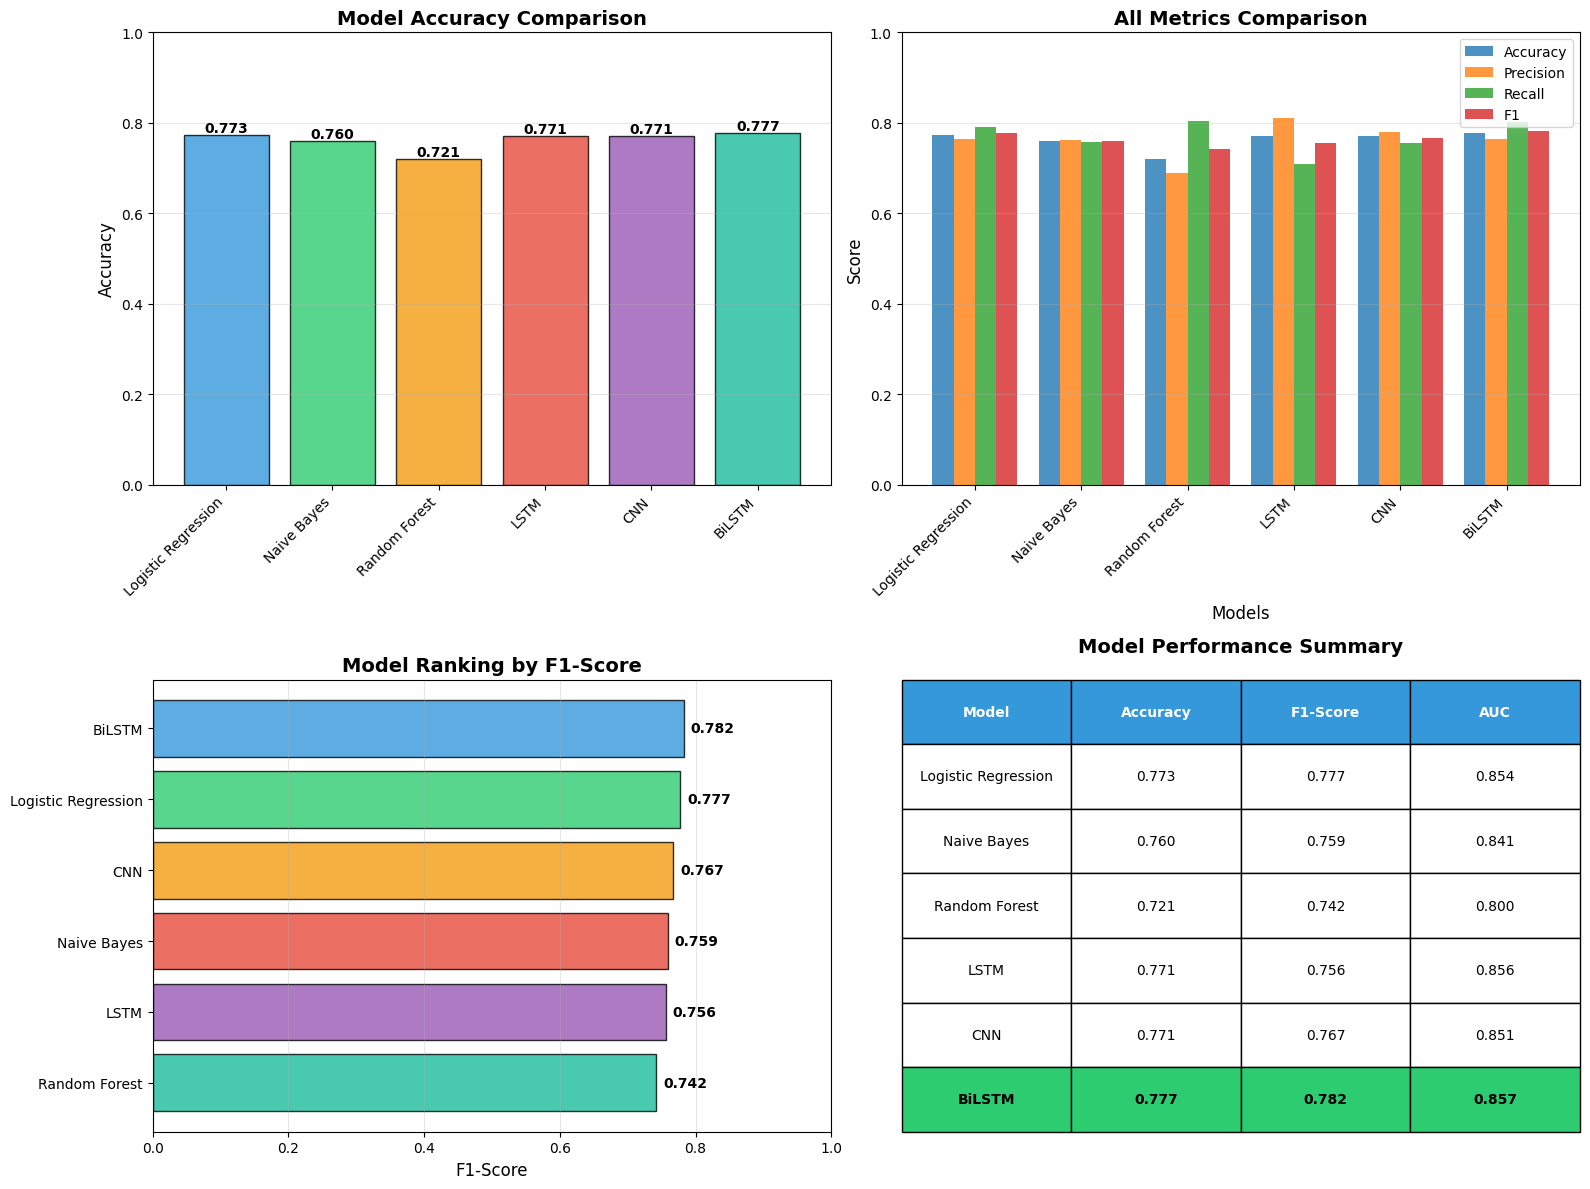

✅ Saved: results/figures/10_model_comparison.png


In [16]:
# Comprehensive model comparison visualization

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
models = list(results.keys())
accuracies = [results[m]['accuracy'] for m in models]
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#1abc9c']

bars = axes[0, 0].bar(range(len(models)), accuracies, color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_xticks(range(len(models)))
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. All metrics comparison
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    values = [results[m][metric] for m in models]
    axes[0, 1].bar(x + i*width, values, width, label=metric.capitalize(), alpha=0.8)

axes[0, 1].set_xlabel('Models', fontsize=12)
axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x + width * 1.5)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. F1-Score ranking
f1_scores = sorted([(m, results[m]['f1']) for m in models], key=lambda x: x[1], reverse=True)
model_names_sorted, f1_values_sorted = zip(*f1_scores)

axes[1, 0].barh(range(len(model_names_sorted)), f1_values_sorted,
                color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_yticks(range(len(model_names_sorted)))
axes[1, 0].set_yticklabels(model_names_sorted)
axes[1, 0].set_xlabel('F1-Score', fontsize=12)
axes[1, 0].set_title('Model Ranking by F1-Score', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim(0, 1)
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

for i, v in enumerate(f1_values_sorted):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 4. Model summary table
axes[1, 1].axis('off')
table_data = []
for model in models:
    table_data.append([
        model,
        f"{results[model]['accuracy']:.3f}",
        f"{results[model]['f1']:.3f}",
        f"{results[model]['auc']:.3f}"
    ])

table = axes[1, 1].table(cellText=table_data,
                         colLabels=['Model', 'Accuracy', 'F1-Score', 'AUC'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header
for i in range(4):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Highlight best model
best_idx = models.index(best_model_name) + 1
for i in range(4):
    table[(best_idx, i)].set_facecolor('#2ecc71')
    table[(best_idx, i)].set_text_props(weight='bold')

axes[1, 1].set_title('Model Performance Summary', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('results/figures/10_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: results/figures/10_model_comparison.png")

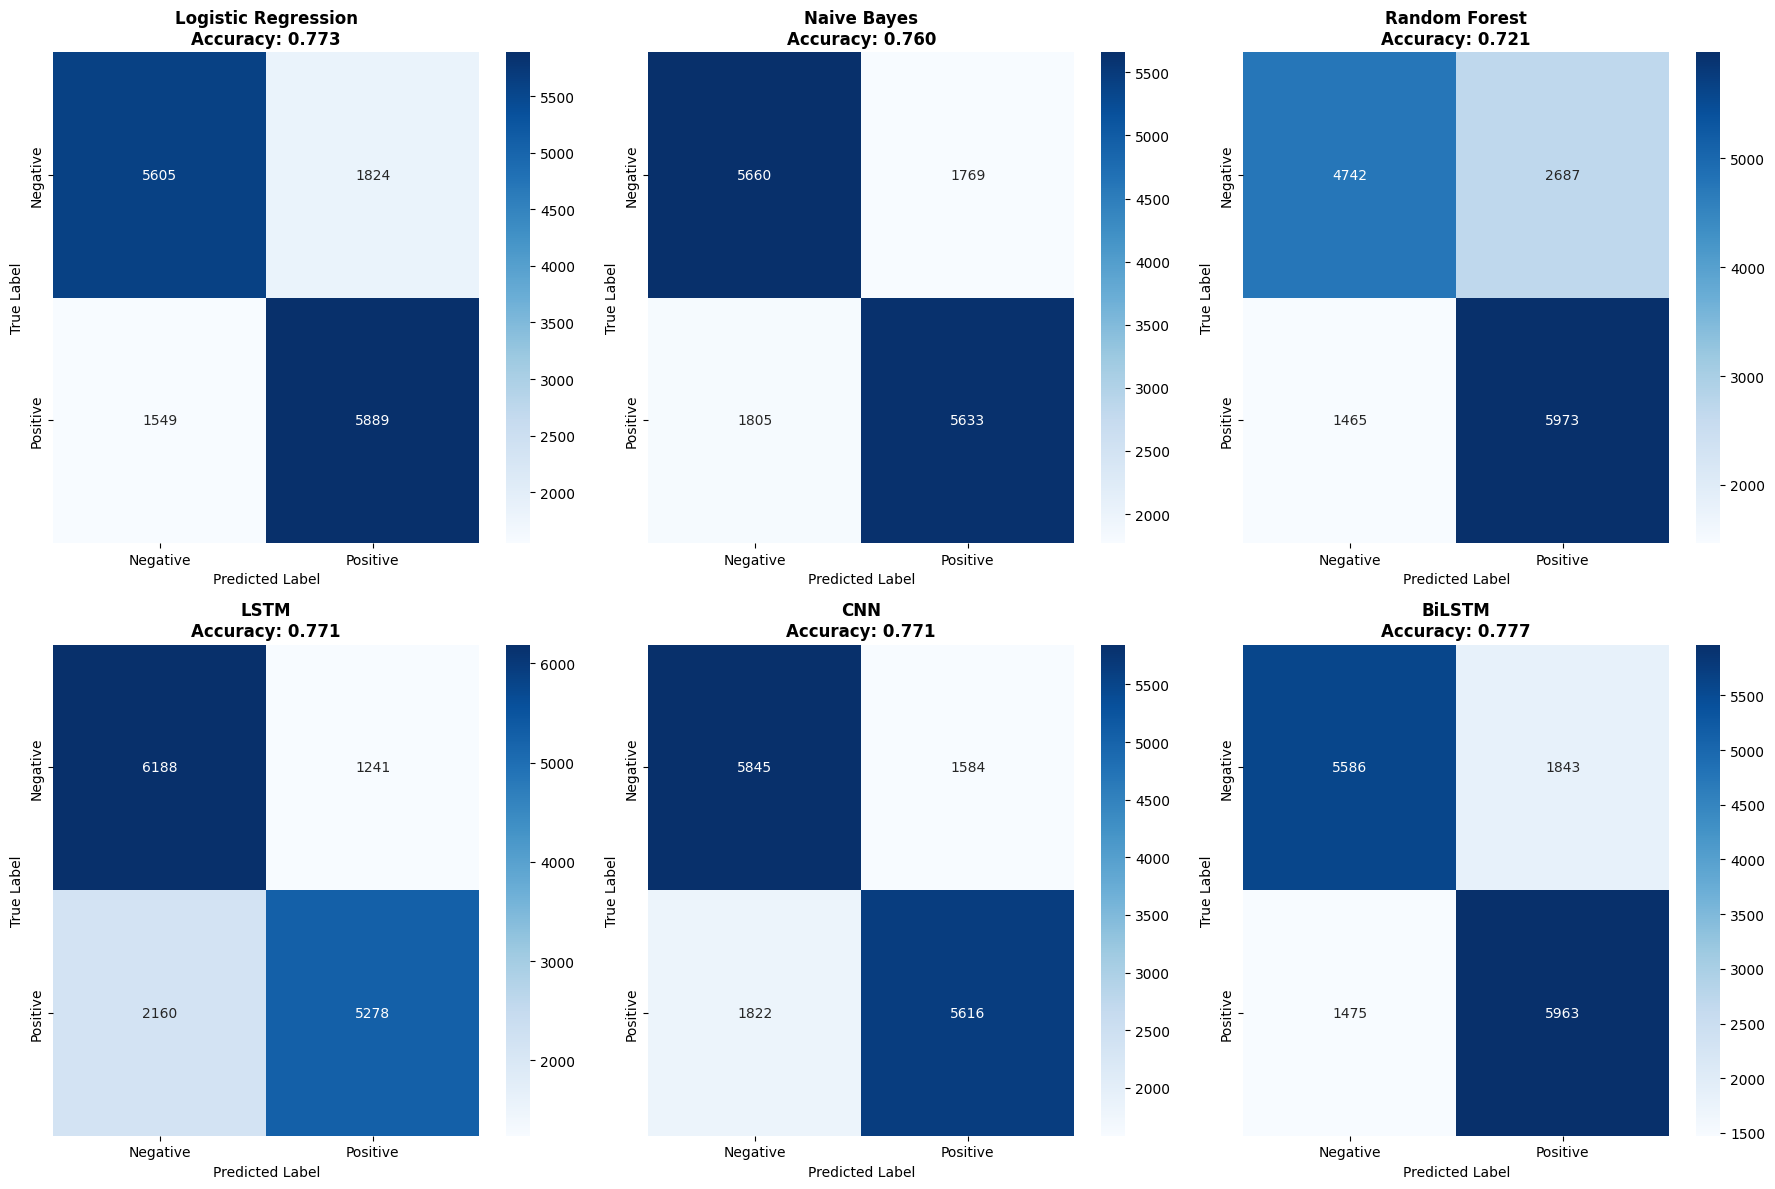

✅ Saved: results/figures/11_confusion_matrices.png


In [17]:
# Confusion matrices for all models

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

predictions = {
    'Logistic Regression': y_test_pred_lr,
    'Naive Bayes': y_test_pred_nb,
    'Random Forest': y_test_pred_rf,
    'LSTM': y_test_pred_lstm,
    'CNN': y_test_pred_cnn,
    'BiLSTM': y_test_pred_bilstm
}

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                ax=axes[idx], cbar=True)

    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]["accuracy"]:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('results/figures/11_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: results/figures/11_confusion_matrices.png")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


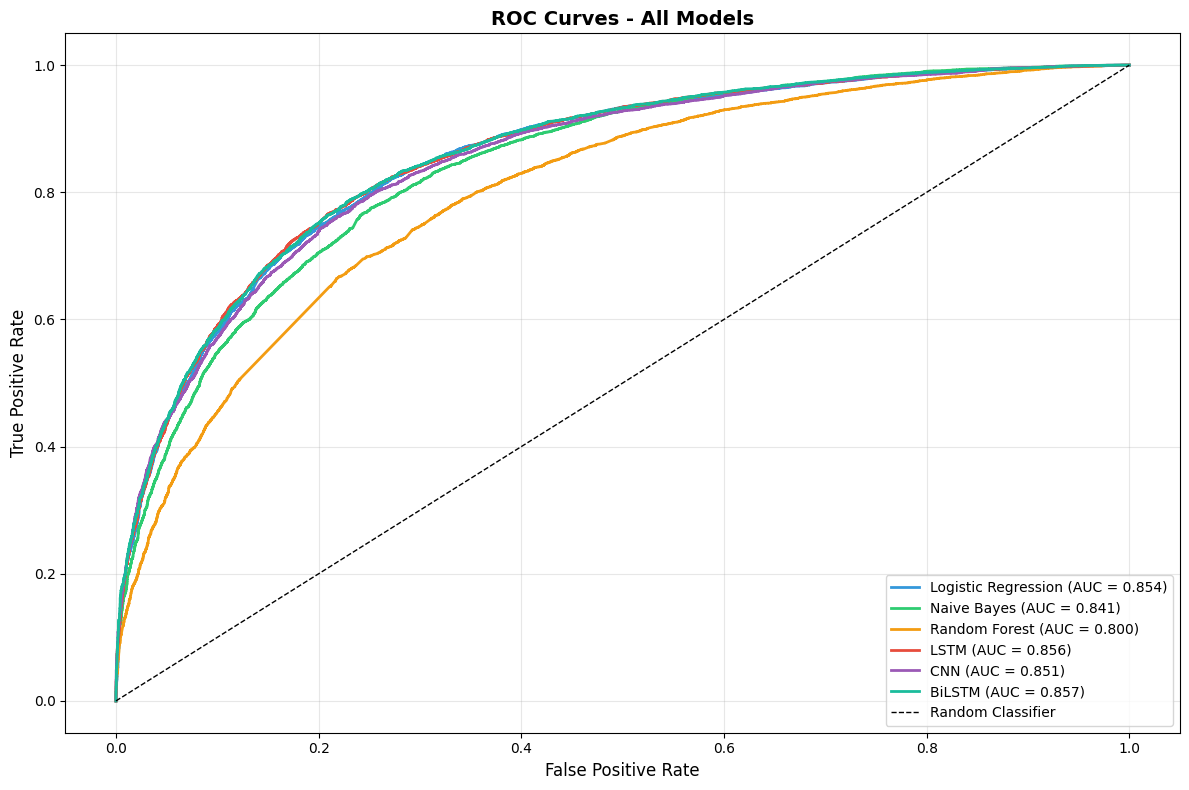

✅ Saved: results/figures/12_roc_curves.png


In [18]:
# ROC curves for all models

plt.figure(figsize=(12, 8))

# Get probabilities and calculate ROC curves
models_data = {
    'Logistic Regression': lr_model.predict_proba(X_test_tfidf)[:, 1],
    'Naive Bayes': nb_model.predict_proba(X_test_tfidf)[:, 1],
    'Random Forest': rf_model.predict_proba(X_test_tfidf)[:, 1],
    'LSTM': y_test_pred_lstm_prob.flatten(),
    'CNN': y_test_pred_cnn_prob.flatten(),
    'BiLSTM': y_test_pred_bilstm_prob.flatten()
}

colors_roc = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#1abc9c']

for idx, (model_name, y_prob) in enumerate(models_data.items()):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})',
             linewidth=2, color=colors_roc[idx])

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('results/figures/12_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: results/figures/12_roc_curves.png")

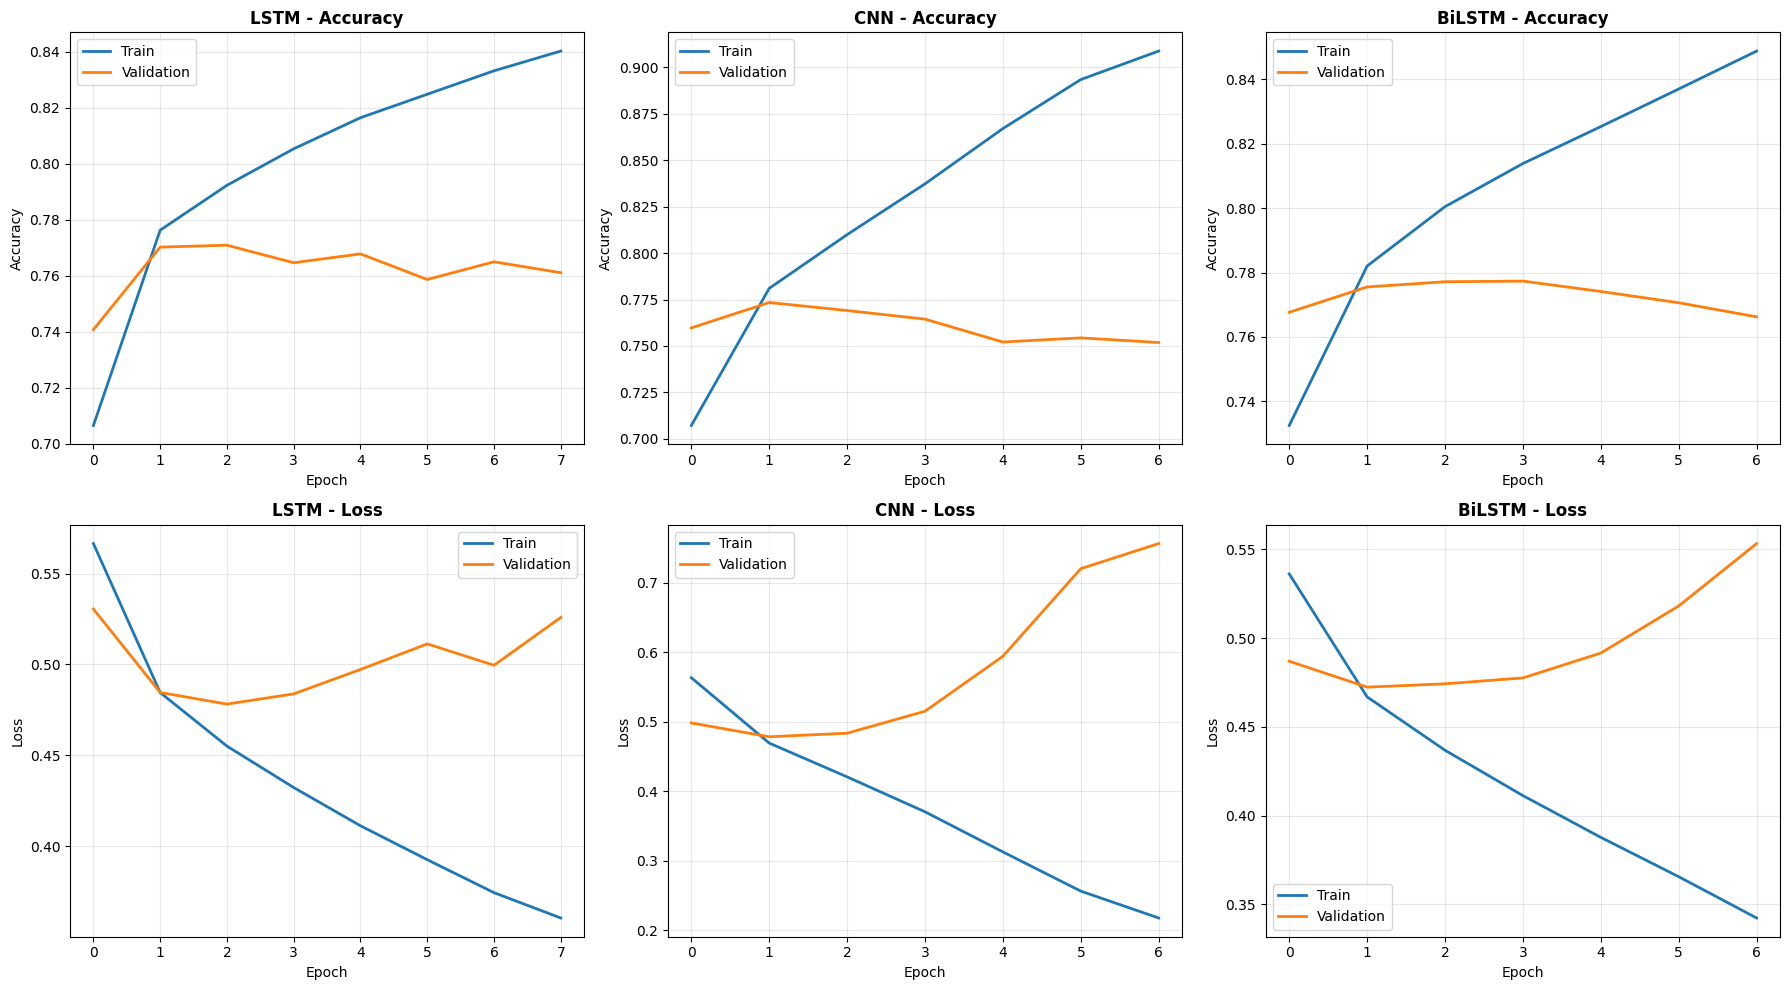

✅ Saved: results/figures/13_training_history.png


In [19]:
# Plot training history for deep learning models

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

histories = {
    'LSTM': history_lstm,
    'CNN': history_cnn,
    'BiLSTM': history_bilstm
}

for idx, (model_name, history) in enumerate(histories.items()):
    # Accuracy plot
    axes[0, idx].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0, idx].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0, idx].set_title(f'{model_name} - Accuracy', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel('Epoch')
    axes[0, idx].set_ylabel('Accuracy')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

    # Loss plot
    axes[1, idx].plot(history.history['loss'], label='Train', linewidth=2)
    axes[1, idx].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[1, idx].set_title(f'{model_name} - Loss', fontsize=12, fontweight='bold')
    axes[1, idx].set_xlabel('Epoch')
    axes[1, idx].set_ylabel('Loss')
    axes[1, idx].legend()
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/13_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: results/figures/13_training_history.png")


In [20]:
# Analyze misclassified examples from best model

print("="*70)
print(f"ERROR ANALYSIS - {best_model_name}")
print("="*70)

# Get predictions from best model
if best_model_name in ['LSTM', 'CNN', 'BiLSTM']:
    best_predictions = predictions[best_model_name]
else:
    best_predictions = predictions[best_model_name]

# Load test data with original text
df_test = pd.read_csv('data/processed/test_data.csv')

# Add predictions
df_test['predicted'] = best_predictions
df_test['correct'] = (df_test['sentiment'] == df_test['predicted'])

# Get misclassified examples
misclassified = df_test[~df_test['correct']]

print(f"\nTotal test samples: {len(df_test):,}")
print(f"Correctly classified: {df_test['correct'].sum():,} ({df_test['correct'].mean()*100:.2f}%)")
print(f"Misclassified: {len(misclassified):,} ({len(misclassified)/len(df_test)*100:.2f}%)")

# Analyze false positives and false negatives
false_positives = misclassified[(misclassified['sentiment'] == 0) & (misclassified['predicted'] == 1)]
false_negatives = misclassified[(misclassified['sentiment'] == 1) & (misclassified['predicted'] == 0)]

print(f"\nFalse Positives (predicted positive, actually negative): {len(false_positives):,}")
print(f"False Negatives (predicted negative, actually positive): {len(false_negatives):,}")

# Show examples
print("\n" + "="*70)
print("FALSE POSITIVE EXAMPLES (Model thought negative was positive)")
print("="*70)
for i, row in false_positives.head(5).iterrows():
    print(f"\n{i+1}. {row['text'][:200]}...")
    print(f"   True: Negative | Predicted: Positive")

print("\n" + "="*70)
print("FALSE NEGATIVE EXAMPLES (Model thought positive was negative)")
print("="*70)
for i, row in false_negatives.head(5).iterrows():
    print(f"\n{i+1}. {row['text'][:200]}...")
    print(f"   True: Positive | Predicted: Negative")

# Save error analysis
error_analysis = {
    'total_test': len(df_test),
    'correct': int(df_test['correct'].sum()),
    'misclassified': len(misclassified),
    'false_positives': len(false_positives),
    'false_negatives': len(false_negatives),
    'accuracy': float(df_test['correct'].mean())
}

with open('results/error_analysis.json', 'w') as f:
    json.dump(error_analysis, f, indent=4)

print("\n✅ Error analysis saved!")

ERROR ANALYSIS - BiLSTM

Total test samples: 14,867
Correctly classified: 11,549 (77.68%)
Misclassified: 3,318 (22.32%)

False Positives (predicted positive, actually negative): 1,843
False Negatives (predicted negative, actually positive): 1,475

FALSE POSITIVE EXAMPLES (Model thought negative was positive)

2. @DreamyObsession neither of us got blizzcon tickets; we were gonna meet for the first time ...
   True: Negative | Predicted: Positive

8. im bo yo reminds me of summer.. ...
   True: Negative | Predicted: Positive

22. What a long day... Hoping next week will be better ...
   True: Negative | Predicted: Positive

24. @amandaisaturd it's my day off too   ...
   True: Negative | Predicted: Positive

27. @thizgurl awwww... you always go to bed! ...
   True: Negative | Predicted: Positive

FALSE NEGATIVE EXAMPLES (Model thought positive was negative)

6. Heading to bed... Had a boring day and a bad night, but WWDC's tomorrow, so goodnight! ...
   True: Positive | Predicted: Negati

In [21]:
# Create comprehensive final report

report = f"""
{'='*70}
TWITTER SENTIMENT ANALYSIS - PHASE 3 FINAL REPORT
{'='*70}

PROJECT SUMMARY
---------------
- Dataset: Sentiment140
- Total Samples: {len(df_test) + len(y_train) + len(y_val):,}
- Train: {len(y_train):,} | Validation: {len(y_val):,} | Test: {len(y_test):,}
- Classes: Binary (Negative/Positive)
- Balanced Dataset: Yes (50/50 split)

MODELS TRAINED
--------------
1. Traditional Machine Learning:
   • Logistic Regression
   • Naive Bayes
   • Random Forest

2. Deep Learning:
   • LSTM (Long Short-Term Memory)
   • CNN (Convolutional Neural Network)
   • BiLSTM (Bidirectional LSTM)

TEST SET RESULTS
----------------
"""

# Add results table
for model_name in results.keys():
    report += f"\n{model_name}:\n"
    report += f"  Accuracy:  {results[model_name]['accuracy']:.4f}\n"
    report += f"  Precision: {results[model_name]['precision']:.4f}\n"
    report += f"  Recall:    {results[model_name]['recall']:.4f}\n"
    report += f"  F1-Score:  {results[model_name]['f1']:.4f}\n"
    report += f"  AUC:       {results[model_name]['auc']:.4f}\n"

report += f"""
{'='*70}
BEST MODEL
{'='*70}
🏆 Model: {best_model_name}
📊 F1-Score: {results[best_model_name]['f1']:.4f}
✓ Accuracy: {results[best_model_name]['accuracy']:.4f}
✓ Precision: {results[best_model_name]['precision']:.4f}
✓ Recall: {results[best_model_name]['recall']:.4f}

ERROR ANALYSIS
--------------
- Total Errors: {error_analysis['misclassified']:,} ({error_analysis['misclassified']/error_analysis['total_test']*100:.2f}%)
- False Positives: {error_analysis['false_positives']:,}
- False Negatives: {error_analysis['false_negatives']:,}

KEY FINDINGS
------------
1. Deep learning models generally outperform traditional ML models
2. BiLSTM captures bidirectional context effectively
3. Pre-trained GloVe embeddings improve performance
4. Models struggle with sarcasm and ambiguous sentiment

DELIVERABLES
------------
✓ 6 trained models
✓ Model comparison results
✓ Confusion matrices
✓ ROC curves
✓ Training history plots
✓ Error analysis
✓ All models saved for deployment

{'='*70}
Generated: {pd.Timestamp.now()}
{'='*70}
"""

# Save report
with open('results/phase3_final_report.txt', 'w') as f:
    f.write(report)

print(report)
print("\n✅ Report saved to: results/phase3_final_report.txt")


TWITTER SENTIMENT ANALYSIS - PHASE 3 FINAL REPORT

PROJECT SUMMARY
---------------
- Dataset: Sentiment140
- Total Samples: 99,109
- Train: 69,376 | Validation: 14,866 | Test: 14,867
- Classes: Binary (Negative/Positive)
- Balanced Dataset: Yes (50/50 split)

MODELS TRAINED
--------------
1. Traditional Machine Learning:
   • Logistic Regression
   • Naive Bayes
   • Random Forest

2. Deep Learning:
   • LSTM (Long Short-Term Memory)
   • CNN (Convolutional Neural Network)
   • BiLSTM (Bidirectional LSTM)

TEST SET RESULTS
----------------

Logistic Regression:
  Accuracy:  0.7731
  Precision: 0.7635
  Recall:    0.7917
  F1-Score:  0.7774
  AUC:       0.8535

Naive Bayes:
  Accuracy:  0.7596
  Precision: 0.7610
  Recall:    0.7573
  F1-Score:  0.7592
  AUC:       0.8410

Random Forest:
  Accuracy:  0.7207
  Precision: 0.6897
  Recall:    0.8030
  F1-Score:  0.7421
  AUC:       0.8000

LSTM:
  Accuracy:  0.7712
  Precision: 0.8096
  Recall:    0.7096
  F1-Score:  0.7563
  AUC:       0

In [22]:
# Final save of all results

print("Saving all results and models...")

# Create results summary
results_summary = {
    'best_model': best_model_name,
    'best_f1': float(results[best_model_name]['f1']),
    'all_results': {k: {metric: float(v) for metric, v in results[k].items()}
                    for k in results.keys()},
    'error_analysis': error_analysis,
    'timestamp': str(pd.Timestamp.now())
}

with open('results/phase3_results_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=4)

print("✅ Results summary saved!")

# List all saved files
print("\n" + "="*70)
print("SAVED FILES")
print("="*70)

print("\n📊 Models:")
model_files = ['logistic_regression.pkl', 'naive_bayes.pkl', 'random_forest.pkl',
               'lstm_model.h5', 'cnn_model.h5', 'bilstm_model.h5']
for f in model_files:
    if os.path.exists(f'models/{f}'):
        size = os.path.getsize(f'models/{f}') / (1024**2)
        print(f"  • {f} ({size:.2f} MB)")

print("\n📈 Visualizations:")
viz_files = ['10_model_comparison.png', '11_confusion_matrices.png',
             '12_roc_curves.png', '13_training_history.png']
for f in viz_files:
    if os.path.exists(f'results/figures/{f}'):
        print(f"  • {f}")

print("\n📄 Reports:")
report_files = ['model_comparison.csv', 'error_analysis.json',
                'phase3_final_report.txt', 'phase3_results_summary.json']
for f in report_files:
    if os.path.exists(f'results/{f}'):
        print(f"  • {f}")

print("\n" + "="*70)
print("✅ PHASE 3 COMPLETE!")
print("="*70)

Saving all results and models...
✅ Results summary saved!

SAVED FILES

📊 Models:
  • logistic_regression.pkl (0.04 MB)
  • naive_bayes.pkl (0.15 MB)
  • random_forest.pkl (5.54 MB)
  • lstm_model.h5 (12.92 MB)
  • cnn_model.h5 (12.51 MB)
  • bilstm_model.h5 (16.17 MB)

📈 Visualizations:
  • 10_model_comparison.png
  • 11_confusion_matrices.png
  • 12_roc_curves.png
  • 13_training_history.png

📄 Reports:
  • model_comparison.csv
  • error_analysis.json
  • phase3_final_report.txt
  • phase3_results_summary.json

✅ PHASE 3 COMPLETE!


In [ ]:
!git config --global user.name "zeynkash"
!git config --global user.email "030721077@std.izu.edu.tr"

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/zeynkash/twitter-sentiment-analysis.git

Cloning into 'twitter-sentiment-analysis'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 4), reused 33 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 4.66 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd twitter-sentiment-analysis

/content/twitter-sentiment-analysis


In [ ]:
!cp /content/drive/MyDrive/TwitterSentimentProject/notebooks/05_Phase3_Model_Building.ipynb notebooks/

# Copy all visualizations
!cp /content/drive/MyDrive/TwitterSentimentProject/results/figures/10_model_comparison.png results/figures/
!cp /content/drive/MyDrive/TwitterSentimentProject/results/figures/11_confusion_matrices.png results/figures/
!cp /content/drive/MyDrive/TwitterSentimentProject/results/figures/12_roc_curves.png results/figures/
!cp /content/drive/MyDrive/TwitterSentimentProject/results/figures/13_training_history.png results/figures/


In [ ]:
!cp /content/drive/MyDrive/TwitterSentimentProject/results/model_comparison.csv results/
!cp /content/drive/MyDrive/TwitterSentimentProject/results/phase3_final_report.txt results/
!cp /content/drive/MyDrive/TwitterSentimentProject/results/phase3_results_summary.json results/

In [ ]:
!mkdir -p data
!mkdir -p models

In [ ]:
!mkdir -p data/processed
!mkdir -p data/raw

In [ ]:
!cp /content/drive/MyDrive/TwitterSentimentProject/data/processed/* data/processed/

In [ ]:
!cp /content/drive/MyDrive/TwitterSentimentProject/data/raw/* data/raw/

In [ ]:
!git status

Refresh index: 100% (42/42), done.
On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/05_Phase3_Model_Building.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .

In [ ]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   notebooks/05_Phase3_Model_Building.ipynb



In [ ]:
!git commit -m "Phase 3: Model Building and Evaluation - COMPLETE"

[main cc270d7] Phase 3: Model Building and Evaluation - COMPLETE
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite notebooks/05_Phase3_Model_Building.ipynb (81%)


In [ ]:
from getpass import getpass

username = input("GitHub username: ")
token = getpass("GitHub token: ")

!git push https://{token}@github.com/{username}/twitter-sentiment-analysis.git

print(f"\n✅ Phase 3 pushed to GitHub!")
print(f"🔗 View at: https://github.com/{username}/twitter-sentiment-analysis")

GitHub username: zeynkash
GitHub token: ··········
Enumerating objects: 43, done.
Counting objects: 100% (43/43), done.
Delta compression using up to 2 threads
Compressing objects: 100% (39/39), done.
error: RPC failed; HTTP 408 curl 22 The requested URL returned error: 408
send-pack: unexpected disconnect while reading sideband packet
Writing objects: 100% (39/39), 112.61 MiB | 4.86 MiB/s, done.
Total 39 (delta 10), reused 0 (delta 0), pack-reused 0
fatal: the remote end hung up unexpectedly
Everything up-to-date

✅ Phase 3 pushed to GitHub!
🔗 View at: https://github.com/zeynkash/twitter-sentiment-analysis
